In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [4]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Посмотрим информацию по датасету. Есть ли строковые показатели и пропуски.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


К счатью нет пропусков и даже нет строковых показателей.

Посмотрим статистические показатели. средние, отклонения, максимумы\минимумы и оценим нужность каждого показателя.

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
У CRIM  и ZN очень большой разброс. Посмотрим на всякий случай на распределение

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <a list of 10 Patch objects>)

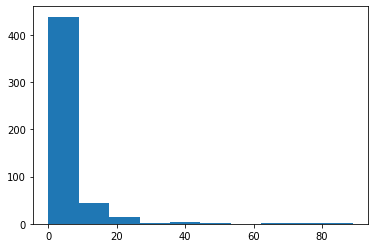

In [15]:
plt.hist(data.CRIM)

Есть какие-то выборосы, рассмотрим их повнимательнее.

In [29]:
data[data.CRIM > 30].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0


На ошибочные данные вроде не похоже, но всего 5 записей со старыми домами, далеко от центра. Может стоит выкинуть эти записи.. посмотрим.

Из общих соображений ZN  и CHAS тоже кажется, что не должны влиять на цену.

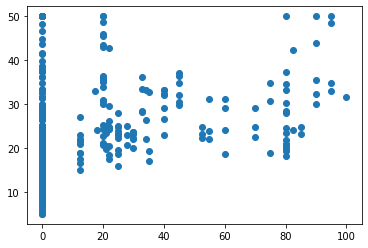

In [22]:
plt.scatter(data.ZN, data.MEDV)

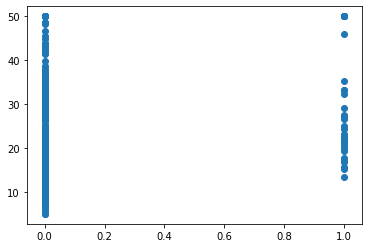

In [23]:
plt.scatter(data.CHAS, data.MEDV)

Посмотрим на коррекляцию по этим пораметрам и решим что с ними делать.

И посмотрим а как у нас распределен целевой показатель

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

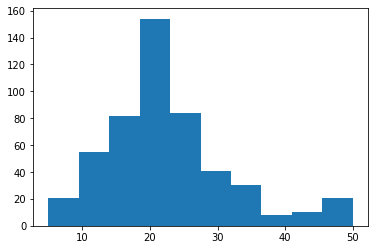

In [24]:
plt.hist(data.MEDV)

Почти с нормальным распределением.

Теперь посмотрим на корреляцию

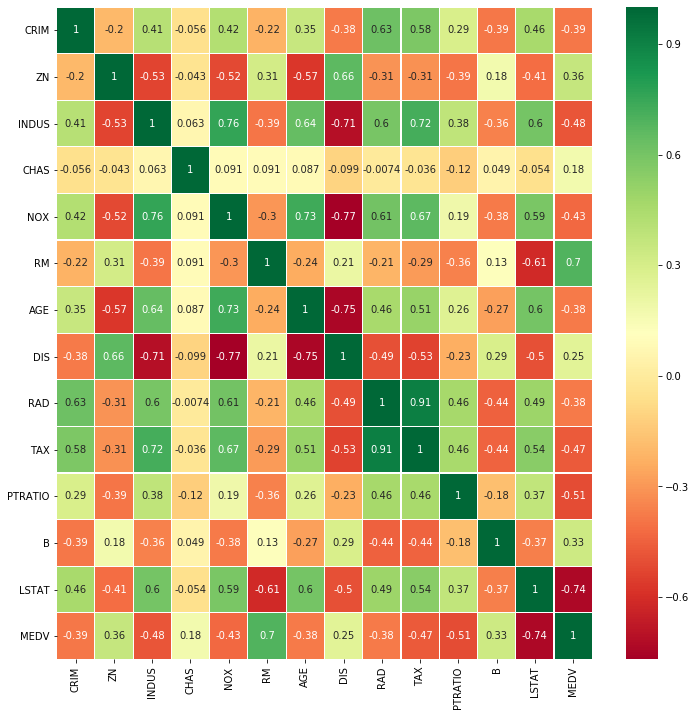

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
CHAS ни с чем не коррелирует. 
RAD  и TAX  имеют высокую корреляцию, поэтому стоит брать одного из них



Возьмем показатели с корреляцией больше 40%

In [171]:
correlations_data = data.corr()[abs(data.corr()['MEDV']) > 0.4]['MEDV'] 
correlations_data.index

Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

In [174]:
data2 = data[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]


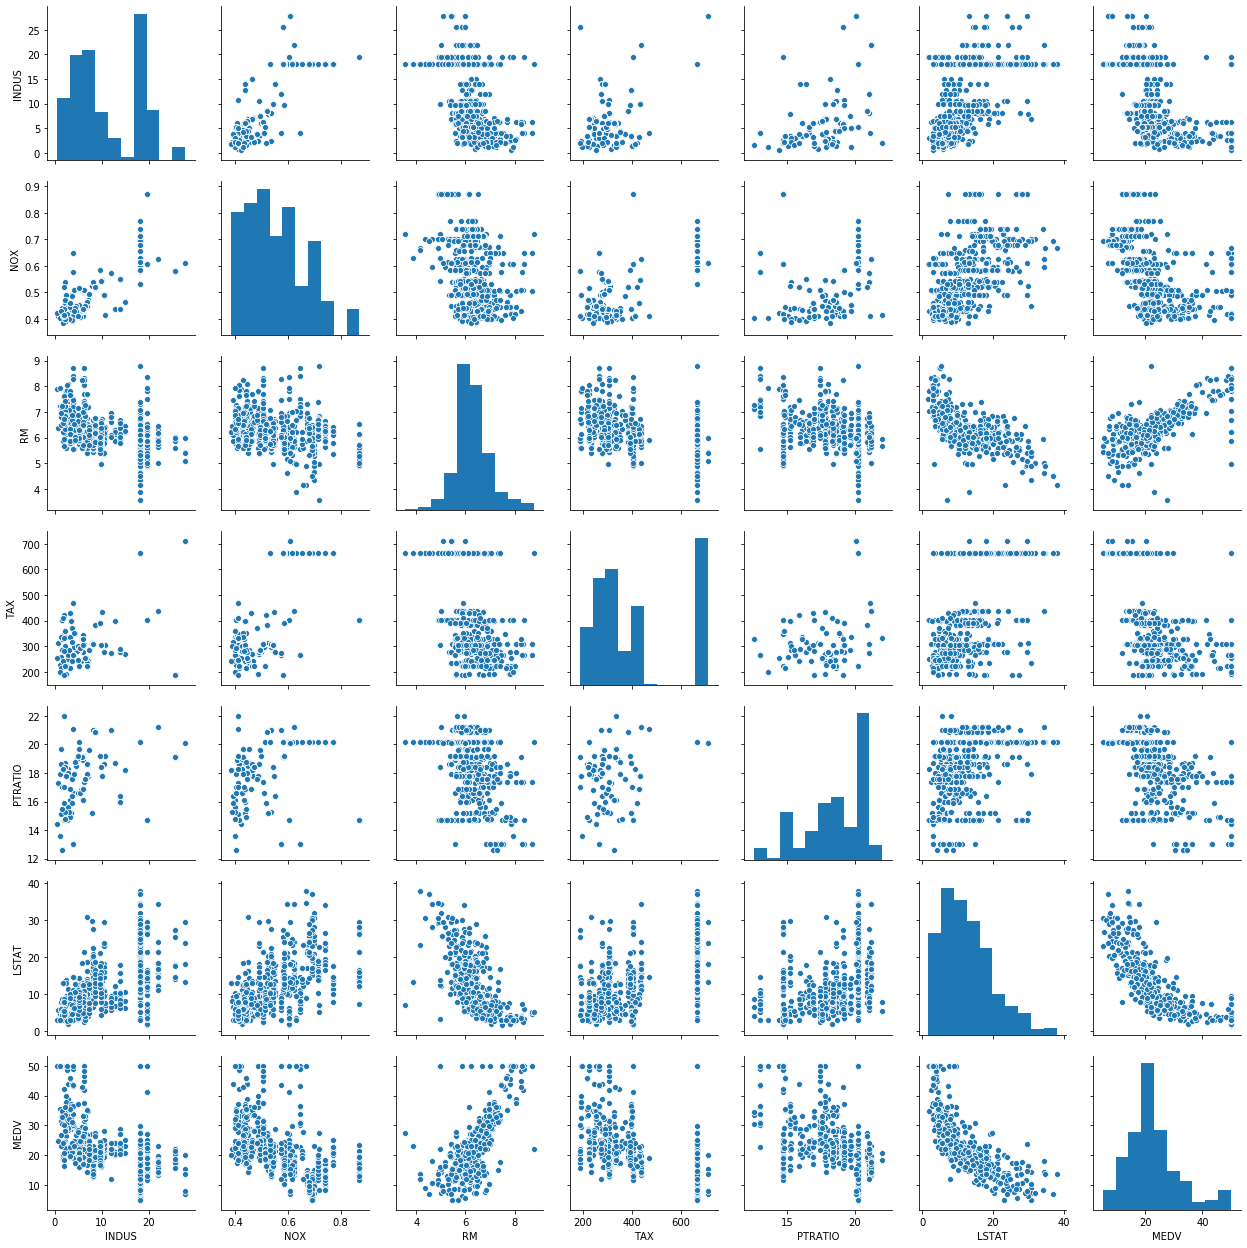

In [175]:
sns.pairplot(data2)

Посмотрим будет ли улучшение после удаления того, что мы считали выбросами.

In [30]:
data1 = data[data.CRIM < 30]

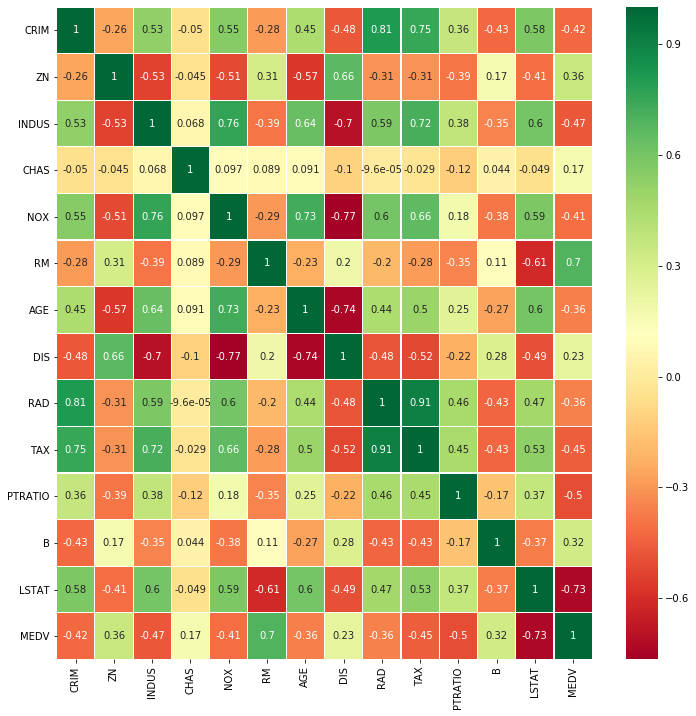

In [142]:
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
По-моему как-то подухудшилась связь. Отставим идею с выбросами.

Начнем строить модели

In [155]:
from sklearn.model_selection import train_test_split
import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [169]:
# Начнем с данных, коррелирующих более 50%
X = data[['RM', 'PTRATIO', 'LSTAT']]
y = data.MEDV

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.6542932795600379
RMSE: 	 0.20843192333329885
MAE: 	 0.1523100984887106


In [182]:
# теперь возьмем побольше показателей
X = data[['INDUS', 'NOX', 'RM','TAX','PTRATIO', 'LSTAT']]
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))


R2: 	 0.6499615338199671
RMSE: 	 4.7190081690946295
MAE: 	 3.4351595211696644


Не улучшилось ((
Попробуем нормировать

In [177]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
headers = list(data.columns.values)
np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
data_norm.columns = headers
data_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,-0.155556
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,-0.262222
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,0.320000
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,0.262222
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,0.386667


In [178]:
X = data_norm[['INDUS', 'NOX', 'RM','TAX','PTRATIO', 'LSTAT']]
y = data_norm['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.6499615338199676
RMSE: 	 0.20973369640420564
MAE: 	 0.1526737564964295


In [183]:
X = data_norm[['RM', 'PTRATIO', 'LSTAT']]
y = data_norm['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.6542932795600379
RMSE: 	 0.20843192333329885
MAE: 	 0.1523100984887106


С нормализацией ничего не изменилось.
Данных не много, построим модель по всем показателям

In [185]:
X = data.drop(['MEDV'], axis=1)
y = data.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))


R2: 	 0.7181173900062097
RMSE: 	 4.234742281260934
MAE: 	 3.225410406976305


Уже лучше.
А если убрать CHAS, который казался сосем лишним

In [187]:
X = data.drop(['MEDV','CHAS'], axis=1)
y = data.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))


R2: 	 0.7231634486455408
RMSE: 	 4.196667467861074
MAE: 	 3.198060703351068


TAX  и RAD сильно корреклировали, посмотрим что будет без одного из них

In [188]:
X = data.drop(['MEDV','CHAS','RAD'], axis=1)
y = data.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))


R2: 	 0.7126380513801034
RMSE: 	 4.275702434447908
MAE: 	 3.229162564962911


Все же играет RAD свою роль. 



Итого пока, кроме как использовать почти все показатели, ничего не придумалось.
Какой-то связи для того, чтобы сгенерить новые колонки, тоже не прослеживается.

In [ ]:
Попробуем логорифмировать

In [191]:
data['RM_log'] = np.log(data.RM)
data['PTRATIO_log'] = np.log(data.PTRATIO)
data['LSTAT_log'] = np.log(data.LSTAT)

In [200]:
X = data[['RM_log', 'PTRATIO_log', 'LSTAT_log']]
y = data.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.7284877866884623
RMSE: 	 4.156114732836333
MAE: 	 3.2609403343370262


In [197]:
data['INDUS_log'] = np.log(data.INDUS)
data['NOX_log'] = np.log(data.NOX)
data['TAX_log'] = np.log(data.TAX)

In [198]:
X = data[['RM_log', 'PTRATIO_log', 'LSTAT_log','INDUS_log', 'NOX_log','TAX_log']]
y = data.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))

print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.7157955108440834
RMSE: 	 4.25214739011064
MAE: 	 3.220178213425441


Лучше конечно, но не сильно

In [216]:
data3 = data
for col in data.columns:
    # Skip the Energy Star Score column
    print(col)
    if 'log' in col:
        data = data.drop(col, axis=1)    
        next
    if col in ('MEDV','ZN','CHAS'):
        next
    else:
        data[col + '_log'] = np.log(data[col])
        
   

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MEDV
NOX_log


KeyError: 'NOX_log'

In [217]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RM_log,AGE_log,DIS_log,RAD_log,TAX_log,PTRATIO_log,B_log,LSTAT_log,CRIM_log,INDUS_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,-5.064036,0.837248
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,-3.600502,1.955860
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,-3.601235,1.955860
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,-3.430523,0.779325
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,-2.672924,0.779325


In [ ]:
CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT

In [219]:
X = data[['RM_log', 'PTRATIO_log', 'LSTAT_log','INDUS_log', 'NOX','TAX_log','CRIM_log','ZN','INDUS_log','AGE_log','DIS_log','RAD_log','B_log']]
y = data.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))

print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.7992524309573685
RMSE: 	 3.573699163681792
MAE: 	 2.840046957355019


Надо конечо поаккуратнее разобраться как колонки выбирать )) а то перечисление это не спортивно
Результат модели улучшился, но наверное хотелось бы  и лучше.